# ¿Qué es la visión artificial?

La visión artificial es una rama de la inteligencia artificial (IA) que permite a las computadoras interpretar imágenes y videos. 

## ¿Cómo funciona?

Utiliza algoritmos, cámaras y datos para obtener información de imágenes digitales.

Funciona de forma similar a la visión humana, pero utiliza tecnologías como el machine learning y las redes neuronales convolucionales. Se entrena a las computadoras con grandes cantidades de imágenes para que aprendan a reconocer objetos.

## ¿Qué aplicaciones tiene? 
- Inspección de productos
- Detección de defectos
- Rastreo de piezas y productos
- Procesamiento de imágenes médicas
- Verificación de montajes
- Monitoreo de espacios
- Reconocimiento facial
- Clasificación
- Recomendación
- Supervisión

## ¿En qué industrias se utiliza? 
Energía, Servicios públicos, Manufactura, Automotriz, Médico, Comercio minorista.
La visión artificial permite que las máquinas comprendan e interpreten el mundo visual, lo que abre un gran potencial para el desarrollo de nuevas aplicaciones. 

# Detección de rostros con Python usando OpenCV

La detección facial es el proceso de localizar rostros humanos en imágenes o videos mediante el análisis de las características visuales. Dado que los rostros varían mucho entre personas, los modelos necesitan ser entrenados con una gran cantidad de datos que representen diferentes etnias, géneros y condiciones, como iluminación o ángulos variados. Esto hace que el entrenamiento sea complejo y requiera muchos recursos.

Sin embargo, gracias a herramientas como OpenCV, que ofrece modelos preentrenados, es posible realizar detección facial sin necesidad de entrenar desde cero. Esta biblioteca utiliza una técnica de aprendizaje automático conocida como *cascada de Haar* para reconocer rostros y otros objetos visuales.

Para hacer uso de la libreria OpenCv, se debe descargar la biblioteca de datos preentrenados.
https://github.com/opencv/opencv/tree/master/data/haarcascades

En este caso descargaremos la data llamada  haarcascade_frontalface_default.xml y guardarla dentro de la carpeta del proyecto que vayamos a crear. 

## Pasos para el uso de OpenCv en la detección de rostros

1. Intalamos OpenCv


In [2]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Rubiela Beleño\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


2. importamos la librería de OpenCv

In [3]:
import cv2

3. Introducimos la ruta de la imagen a utilizar

In [14]:
imagePath = 'input_image2.jpg'

4. Se lee la imagen desde la ruta con la función imread(), con esta función utilizando cv2, cargará la imagen desde la ruta de archivo especificada y la devolverá en forma de matriz Numpy. 

In [15]:
img = cv2.imread(imagePath)

5. Se utiliza la función shape para visualizar las dimensiones de la Matriz  que pertenece a la imagen

In [16]:
img.shape

(140, 85, 3)

6. convertimos la imagen a escala de grises para mejorar la eficiencia computacional

In [18]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

7. revisamos las dimensiones de la imagen en escala de grises

In [19]:
gray_image.shape

(140, 85)

 8. Cargamos el clasificador Haar Cascade incorporado en OpenCv

In [20]:
# Cargar el clasificador en cascada
cascade_path = "haarcascade_frontalface_default.xml"
face_classifier = cv2.CascadeClassifier(cascade_path)

# Verificar si el clasificador se cargó correctamente
if face_classifier.empty():
    print("Error: No se pudo cargar el clasificador en cascada. Verifica la ruta del archivo XML.")


9. Se realiza la detección del rostro en la imagen en escala de grises.
Para ellos se hace uso de la función detectMultiscale(), esta se utiliza para detectar caras de diferentes tamaños en la imagen de entrada.

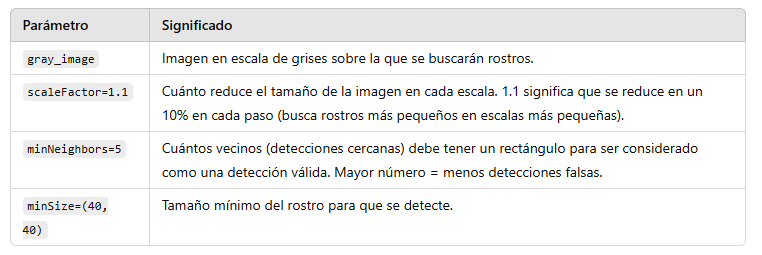

In [21]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

10. Este for recorre todas las caras detectadas por detectMultiScale y dibuja un rectángulo sobre la imagen original (img) para marcar dónde están los rostros.

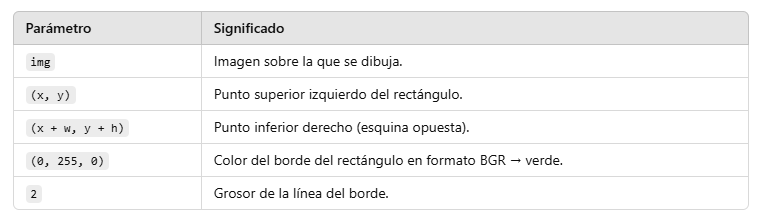

In [22]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

11. OpenCV por defecto carga imágenes en formato BGR (azul, verde, rojo). Como se desea mostrar la imagen, debemos convertir una imagen de formato BGR a RGB, que es muy útil cuando trabajamos con librerías distintas a OpenCV, como matplotlib o PIL, que esperan colores en formato RGB.

In [23]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

12. Importamos matplotlib.pyplot para mostrar la imagen con la detección de rostro.
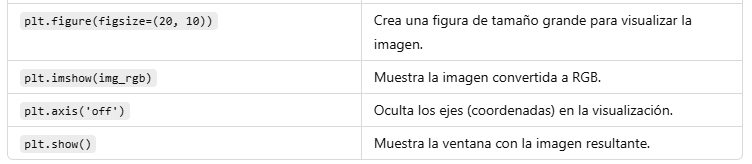

(np.float64(-0.5), np.float64(84.5), np.float64(139.5), np.float64(-0.5))

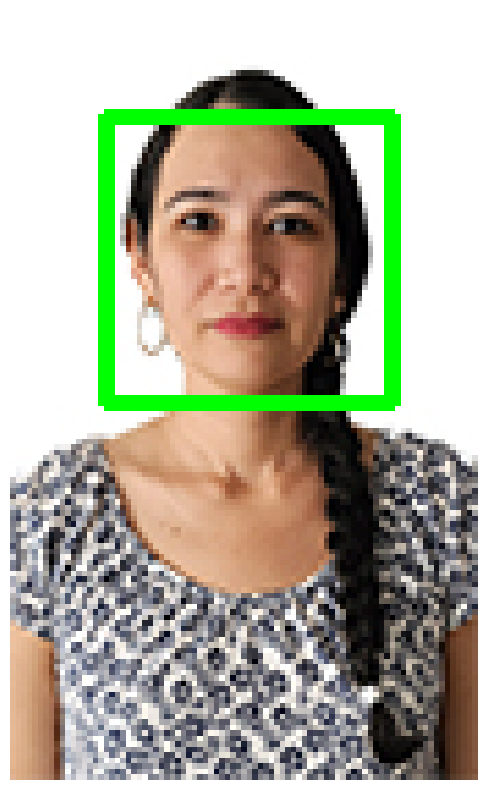

In [24]:
import matplotlib.pyplot as plt



plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

## Captura de video en tiempo real

1. Acceder a la cámara de nuestro pc y leer un flujo de datos en tiempo real

In [25]:
video_capture = cv2.VideoCapture(0) # puedo cambiar la cámara asignada en caso de tener varias al tiempo

2. Creamos una función para detectar los rostros en el flujo de vídeo y para dibujar un cuadro delimitador a su alrededor, en este caso *detect_bounding_box* toma como entrada la captura del video.

In [20]:
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 5, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return faces

3. Creamos un bucle para la detección de caras en tiempo real, en este caso creamos el while para capturar el fotograma del video y aplicar la detección de rostros.

In [21]:
while True:

    result, video_frame = video_capture.read()  
    if result is False:
        break  
    faces = detect_bounding_box(
        video_frame
    )  

    cv2.imshow(
        "My Face Detection Project", video_frame
    )  
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

video_capture.release()
cv2.destroyAllWindows()